## Task 3 - Number Recognition
Handwritten digit recognition system not only detects scanned images of handwritten digits.Handwritten digit recognition using MNIST dataset is a major project made with the help of Neural Network. It basically detectsthe scanned images of handwritten digits.

## Loading the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

## Load the MNIST dataset

In [2]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Normalize the images to values between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Flatten the images from 28x28 to a 1D array of size 784
train_images = train_images.reshape((len(train_images), 28 * 28))
test_images = test_images.reshape((len(test_images), 28 * 28))

## One-hot encode the labels

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Training the Model

In [4]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

In [5]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
epochs = 5  # You can increase this for better accuracy
batch_size = 128

history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 9s 19ms/step - loss: 0.2819 - accuracy: 0.9187 - val_loss: 0.1343 - val_accuracy: 0.9613
Epoch 2/5
422/422 [==============================] - 7s 17ms/step - loss: 0.1168 - accuracy: 0.9655 - val_loss: 0.0805 - val_accuracy: 0.9780
Epoch 3/5
422/422 [==============================] - 9s 21ms/step - loss: 0.0754 - accuracy: 0.9774 - val_loss: 0.0769 - val_accuracy: 0.9787
Epoch 4/5
422/422 [==============================] - 11s 25ms/step - loss: 0.0538 - accuracy: 0.9841 - val_loss: 0.0697 - val_accuracy: 0.9790
Epoch 5/5
422/422 [==============================] - 9s 21ms/step - loss: 0.0399 - accuracy: 0.9883 - val_loss: 0.0637 - val_accuracy: 0.9810


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0653 - accuracy: 0.9800
Test accuracy: 0.9800000190734863


In [8]:
predictions = model.predict(test_images)

# Convert one-hot encoded predictions back to digit labels
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 6ms/step


## Plot a few test images along with their predicted and true labels

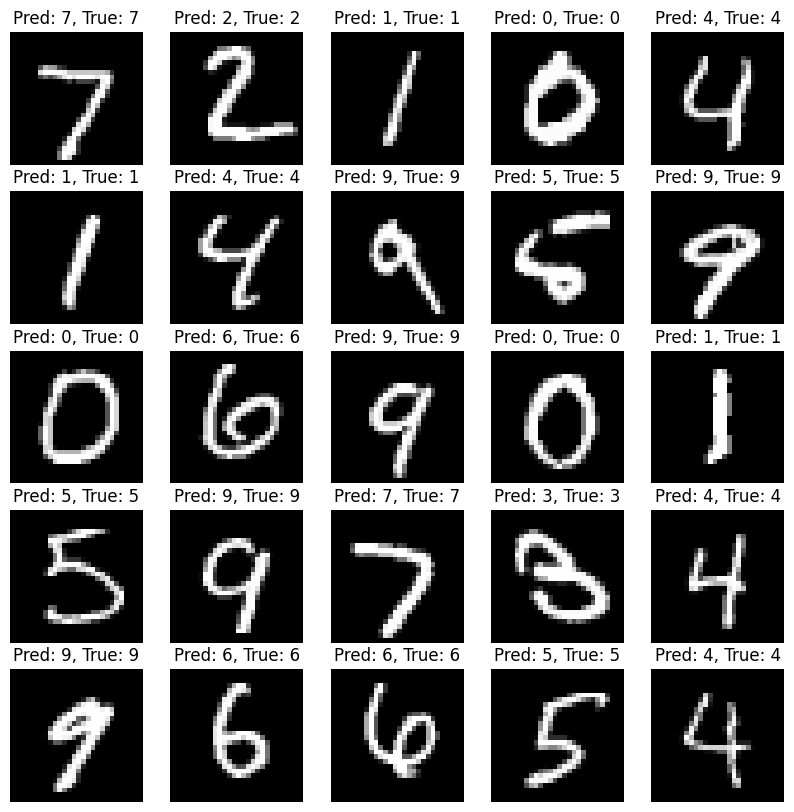

In [9]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}, True: {np.argmax(test_labels[i])}")
    plt.axis('off')
plt.show()


## Accuracy for Test and Training

In [21]:
import keras
# Print the training and testing accuracy
print("Training accuracy:", history.history['accuracy'][-1])
print("Testing accuracy:", test_acc)

# Save the model
model.save('mnist_model.h5')

# Load the model
model = keras.models.load_model('mnist_model.h5')

# Predict the labels for some test images
predictions = model.predict(test_images)

# Print the predictions
print(predictions)

Training accuracy: 0.9882962703704834
Testing accuracy: 0.9797999858856201
313/313 [==============================] - 1s 4ms/step
[[1.2954574e-07 6.9789272e-09 1.9502002e-05 ... 9.9982846e-01
  1.0821873e-06 3.4425077e-06]
 [5.3892034e-08 3.0040997e-05 9.9995339e-01 ... 2.2974660e-12
  5.5297210e-06 9.0472210e-13]
 [5.5443470e-06 9.9814105e-01 2.7403014e-04 ... 1.9012258e-04
  1.0701645e-03 1.8893119e-05]
 ...
 [4.6195834e-12 2.8278024e-12 5.7876315e-11 ... 1.5699652e-06
  2.0600132e-06 1.6381271e-05]
 [1.4960261e-07 9.7625508e-10 4.3035469e-09 ... 1.4906519e-08
  5.3486519e-04 2.7802419e-10]
 [1.2728573e-08 1.1880214e-11 8.0151734e-09 ... 3.7537254e-14
  1.5023305e-10 2.2856390e-10]]


## Model Accuracy for Test and Train

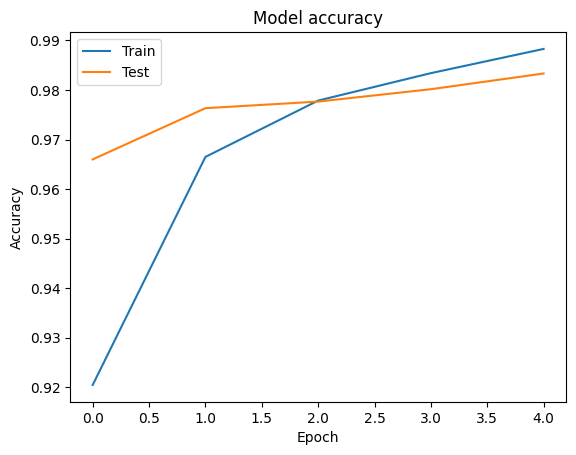

In [22]:
import matplotlib.pyplot as plt

# Plot the training and testing accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()